<a href="https://colab.research.google.com/github/lagnajit007/ImageProcessing/blob/main/Image_processing_assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

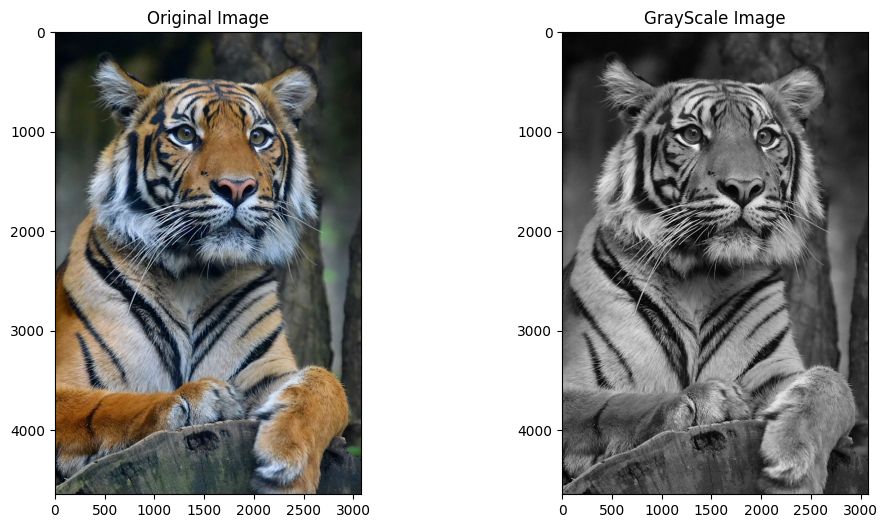

In [ ]:
# Conversion of the color image (RGB) to gray image. (Use ratios
# 0.28:0.59:0.10)


import matplotlib.pyplot as plt
import numpy as np


def RGBtoGRAY(image):
    height, width, _ = image.shape
    output = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            output[i, j] = image[i, j, 0]*0.28 +image[i, j, 1]*0.59 + image[i, j, 2]*0.10
    return output

input_img = plt.imread('tiger.jpg')
grayscale_img = RGBtoGRAY(input_img)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(input_img)
plt.subplot(122)
plt.title("GrayScale Image")
plt.imshow(grayscale_img, cmap="gray")
plt.show()

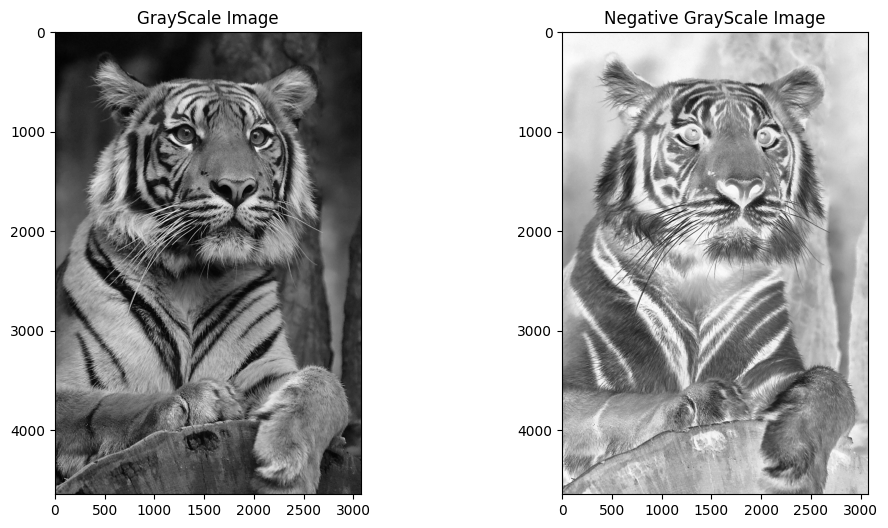

In [ ]:
# colour t negative_grayscale_img

import matplotlib.pyplot as plt
import numpy as np


#convert into gray scale
def RGBtoGRAY(image):
    height, width, _ = image.shape
    output = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            output[i, j] = image[i, j, 0]*0.28 + image[i, j, 1]*0.59 + image[i, j,2]*0.10
    return output

#calculate inversion of image
def NegativeImg(image):
    height, width = image.shape
    output = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            output[i, j] = 255-image[i, j]
    return output

input_img = plt.imread('tiger.jpg')
grayscale_img = RGBtoGRAY(input_img)
negative_grayscale_img = NegativeImg(grayscale_img)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.title("GrayScale Image")
plt.imshow(grayscale_img, cmap="gray")

plt.subplot(122)
plt.title("Negative GrayScale Image")
plt.imshow(negative_grayscale_img, cmap="gray")

plt.show()

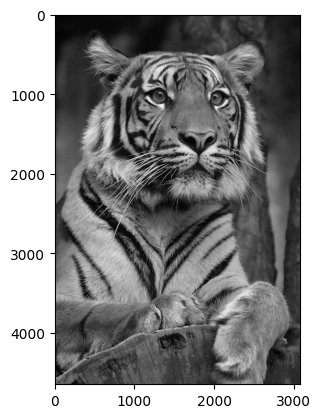

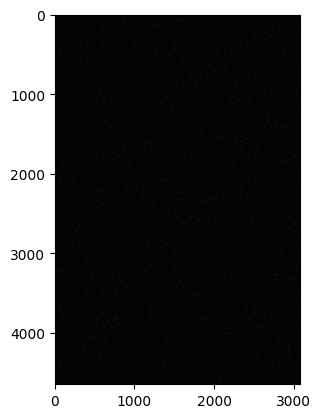

In [ ]:
# salt_and_paper_noise

import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as Img

img = Img.open("tiger.jpg")

imgarr = plt.imread('tiger.jpg')
grayimage = np.dot(imgarr[..., :3], [0.28, 0.59, 0.11])
plt.imshow(grayimage, cmap='gray')
plt.show()


def saltandpaper(image, density):
    output = np.zeros(image.shape, dtype=np.uint8)
    threshold = 1 - density
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            possibilities = random.random()
            if possibilities < density:
                output[i][j] = 0
            elif possibilities > threshold:
                output[i][j] = 255
            else:
                output[i][j]
    return output


noiseimage = saltandpaper(imgarr, density=0.02)
plt.imshow(noiseimage, cmap='gray')
plt.show()

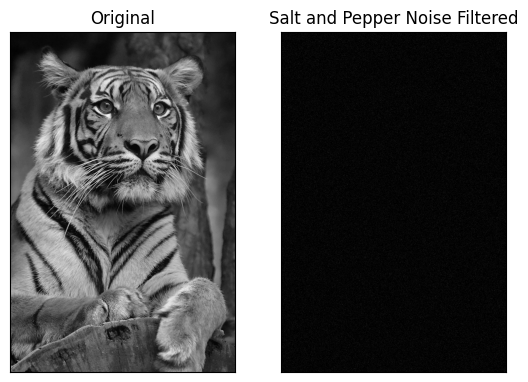

In [ ]:
# salt and paper

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('tiger.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply salt and pepper noise with density 0.02
def saltandpaper(image, density):
    output = np.zeros(image.shape, dtype=np.uint8)
    threshold = 1 - density
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            possibilities = random.random()
            if possibilities < density:
                output[i][j] = 0
            elif possibilities > threshold:
                output[i][j] = 255
            else:
                output[i][j]
    return output

noiseimage = saltandpaper(gray, density=0.02)

# Display the original and filtered images
plt.subplot(121), plt.imshow(gray, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(noiseimage, cmap='gray')
plt.title('Salt and Pepper Noise Filtered'), plt.xticks([]), plt.yticks([])
plt.show()


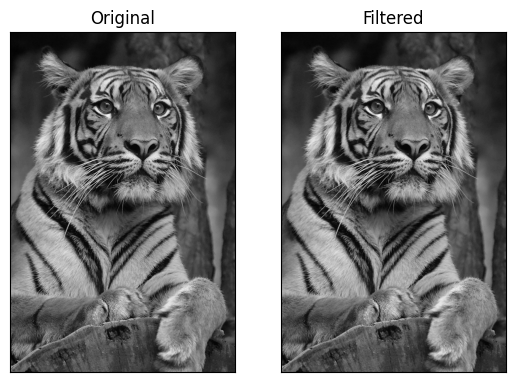

In [ ]:
# mean filter

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('tiger.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply mean filter with kernel size 5x5
filtered = cv2.blur(gray, (5, 5))

# Display the original and filtered images
plt.subplot(121), plt.imshow(gray, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered, cmap='gray')
plt.title('Filtered'), plt.xticks([]), plt.yticks([])
plt.show()


Enter the filter size(odd integer): 3
Enter sigma(e.g. 1.5): 1.5


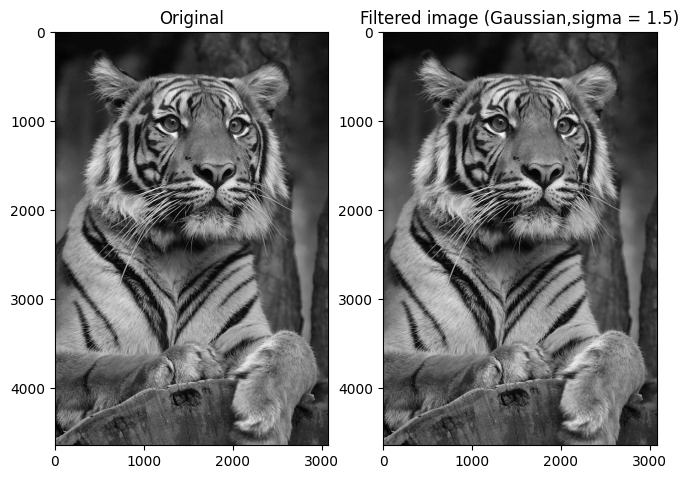

In [ ]:

#gaussian filter

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

input_image = plt.imread('tiger.jpg')
if input_image.shape[-1] == 3:
    input_image = np.dot(input_image[..., :3],[0.28,0.59,0.11])

filter_size = int(input("Enter the filter size(odd integer): "))
sigma = float(input("Enter sigma(e.g. 1.5): "))

if filter_size %2 == 0:
    filter_size += 1

def gaussian_kernel(size,sigma):
    kernel = np.fromfunction(lambda x,y: (1/(2 * np.pi * sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y -(size -1)/2)**2) / (2 * sigma**2)) , (size , size))

    return kernel / np.sum(kernel)
gaussian_filter_kernel = gaussian_kernel(filter_size , sigma)

filtered_image = convolve2d(input_image , gaussian_filter_kernel, mode = 'same' , boundary= 'symm')

plt.figure(figsize=(12,6))


plt.subplot(131)
plt.title('Original')
plt.imshow(input_image , cmap = 'gray')

plt.subplot(132)
plt.title(f"Filtered image (Gaussian,sigma = {sigma})")
plt.imshow(filtered_image , cmap = 'gray')

plt.show()


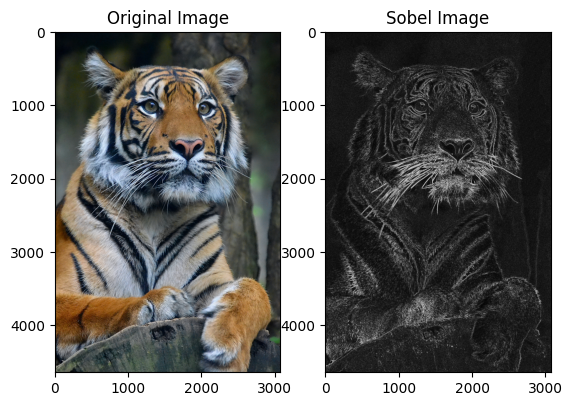

In [ ]:
# SobelOperator


import numpy as np
import matplotlib.pyplot as plt

def SobelOperator(img):
    container = np.copy(img)
    size = container.shape
    for i in range(1, size[0]-1):
        for j in range(1, size[1]-1):
            gx = (img[i-1][j-1]+2*img[i][j-1]+img[i+1][j-1]) - \
(img[i-1][j+1]+2*img[i][j+1]+img[i+1][j+1])
            gy = (img[i-1][j-1]+2*img[i-1][j]+img[i-1][j+1]) - \
(img[i+1][j-1]+2*img[i+1][j]+img[i+1][j+1])
            container[i][j] = min(255, np.sqrt(gx**2+gy**2))
    return container

def RGBtoGRAY(image):
    height, width, _ = image.shape
    output = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            output[i, j] = image[i, j, 0]*0.28 + \
image[i, j, 1]*0.59 + image[i, j, 2]*0.10
    return output

image = plt.imread('tiger.jpg')
gray_img = RGBtoGRAY(image)
sobel_img = SobelOperator(gray_img)

plt.figure()

plt.subplot(121)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(122)
plt.imshow(sobel_img, cmap="gray")
plt.title("Sobel Image")

plt.show()

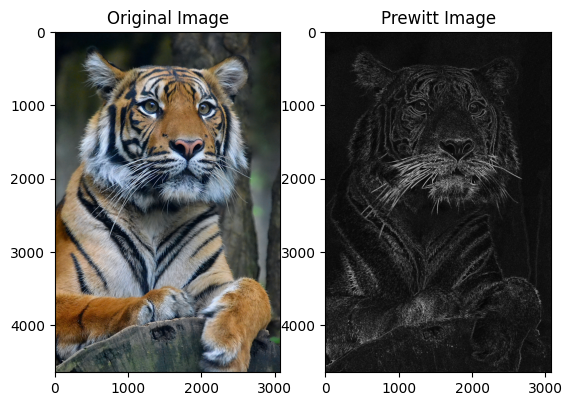

In [ ]:
# prewitt operator

import numpy as np
import matplotlib.pyplot as plt

def PrewittOperator(img):
    container = np.copy(img)
    size = container.shape
    for i in range(1, size[0]-1):
        for j in range(1, size[1]-1):
            gx = (img[i-1][j-1] + img[i][j-1] + img[i+1][j-1]) - (img[i-1][j+1] + img[i][j+1] + img[i+1][j+1])
            gy = (img[i-1][j-1] + img[i-1][j] + img[i-1][j+1]) - (img[i+1][j-1] + img[i+1][j] + img[i+1][j+1])
            container[i][j] = min(255, np.sqrt(gx**2 + gy**2))
    return container

def RGBtoGRAY(image):
    height, width, _ = image.shape
    output = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            output[i, j] = image[i, j, 0]*0.28 + image[i, j, 1]*0.59 + image[i, j, 2]*0.10
    return output

image = plt.imread('tiger.jpg')
gray_img = RGBtoGRAY(image)
prewitt_img = PrewittOperator(gray_img)

plt.figure()

plt.subplot(121)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(122)
plt.imshow(prewitt_img, cmap="gray")
plt.title("Prewitt Image")

plt.show()


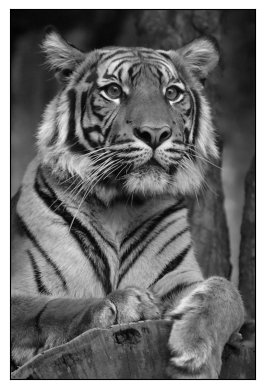

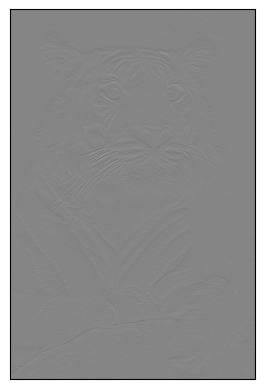

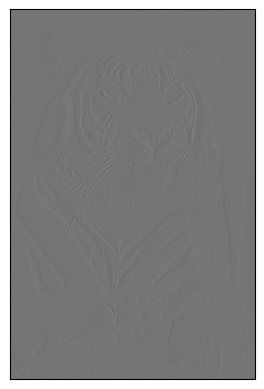

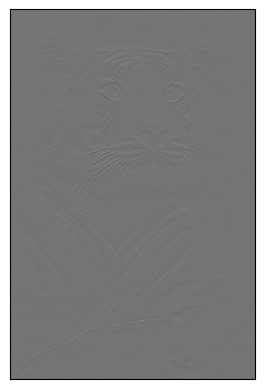

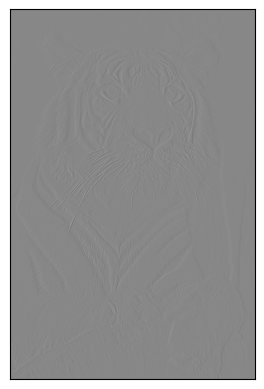

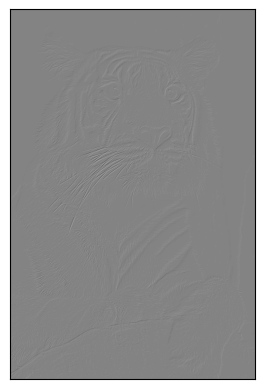

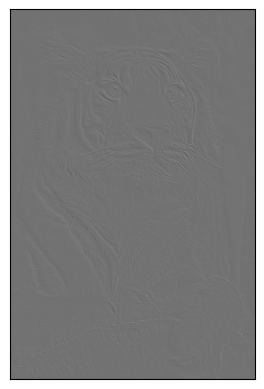

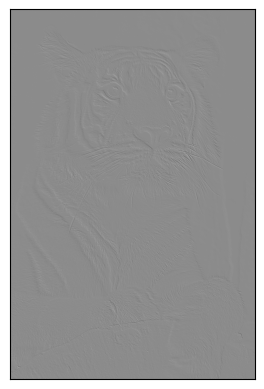

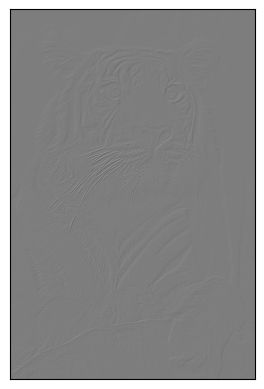

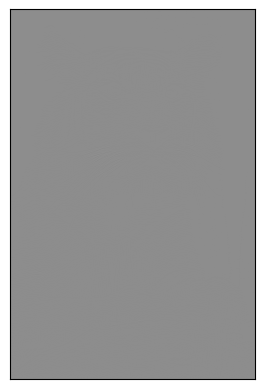

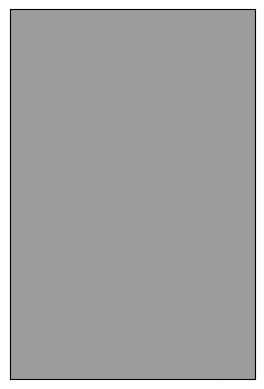

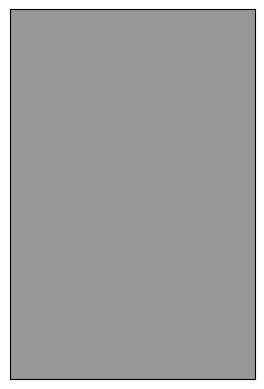

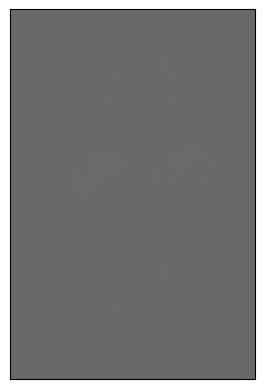

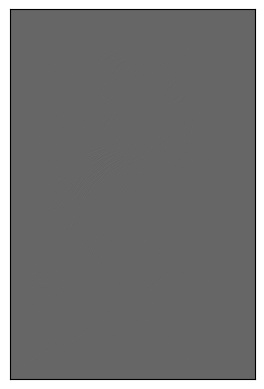

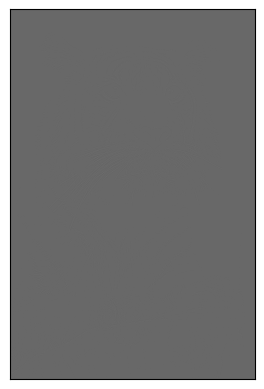

In [ ]:
# kirsch operator in 8 directions

import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('tiger.jpg')
img = np.dot(img[..., :3], [.08, 0.589, 0.11 ])
plt.imshow(img, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

from scipy import ndimage

e_k = np.zeros_like(img)
ka = np.array([[-3,-3,-3],[-3,0,-3],[5,5,5]])
e_k = ndimage.convolve(img,ka,mode='nearest',cval=0.0)

plt.imshow(e_k,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

"""EAST"""

s_k = np.zeros_like(img)
n_k =  np.zeros_like(img)
nw_k =  np.zeros_like(img)
ne_k =  np.zeros_like(img)
sw_k =  np.zeros_like(img)
se_k =  np.zeros_like(img)
w_k = np.zeros_like(img)

na= np.array([[-3,-3,5],[-3,0,5],[-3,-3,5]])
wa= np.array([[5,5,5],[-3,0,-3],[-3,-3,-3]])
sa= np.array([[5,-3,-3],[5,0,-3],[5,-3,-3]])
nea= np.array([[-3,-3,-3],[-3,0,5],[-3,5,5]])
nwa= np.array([[-3,5,5],[-3,0,5],[-3,-3,-3]])
sea= np.array([[-3,-3,-3],[5,0,-3],[5,5,-3]])
swa= np.array([[5,5,-3],[5,0,-3],[-3,-3,-3]])

n_k = ndimage.convolve(img,na,mode = 'nearest', cval=0.0)
s_k = ndimage.convolve(img,sa,mode = 'nearest', cval=0.0)
w_k = ndimage.convolve(img,wa,mode = 'nearest', cval=0.0)
ne_k = ndimage.convolve(img,nea,mode = 'nearest', cval=0.0)
nw_k = ndimage.convolve(img,nwa,mode = 'nearest', cval=0.0)
se_k = ndimage.convolve(img,sea,mode = 'nearest', cval=0.0)
sw_k = ndimage.convolve(img,swa,mode = 'nearest', cval=0.0)

plt.imshow(n_k,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

"""NORTH"""

plt.imshow(w_k,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

"""WEST"""

plt.imshow(s_k,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

"""SOUTH"""

plt.imshow(ne_k,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

"""NORTH-EAST"""

plt.imshow(nw_k,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

"""NORTH-WEST"""

plt.imshow(se_k,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

"""SOUTH-EAST"""

plt.imshow(sw_k,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

"""SOUTH-WEST"""

t_ew = np.add(e_k,w_k)
plt.imshow(t_ew, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

"""EAST+WEST"""
t_ns = np.add(n_k,s_k)

plt.imshow(t_ns,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

"""NORTH+SOUTH"""

t_news = np.add(t_ns,t_ew)

plt.imshow(t_news, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

"""NORTH+EAST+SOUTH+WEST"""

t_nesw = np.add(ne_k, sw_k)

plt.imshow(t_nesw,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

"""NORTH-EAST+SOUTH-WEST"""

t_nwse = np.add(nw_k,se_k)

plt.imshow(t_nwse,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

"""NORTH-WEST+SOUTH-EAST"""

t_fi = np.add(t_nwse,t_nesw)

plt.imshow(t_fi,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()


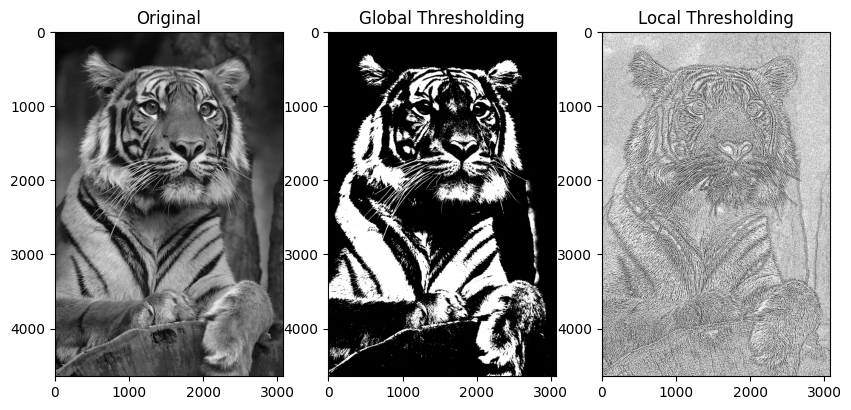

In [ ]:
# global & local Thresholding

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('tiger.jpg')

if len(image.shape) == 3:
    image = np.mean(image, axis = 2).astype(np.uint8)

global_threshold = 127
global_thresholded = (image >= global_threshold)*255

block_size = 10
constant_c = 3

height,width = image.shape
local_thresholded = np.zeros_like(image,dtype = np.uint8)

for i in range(0 , height , block_size):
    for j in range(0, width, block_size):
        block = image[i:i + block_size, j:j + block_size]
        block_mean = np.mean(block)
        threshold = block_mean - constant_c
        local_thresholded[i:i + block_size, j:j + block_size] = (block >= threshold)*255

plt.figure(figsize=(10,5))


plt.subplot(131)
plt.title('Original')
plt.imshow(image , cmap = 'gray')

plt.subplot(132)
plt.title('Global Thresholding')
plt.imshow(global_thresholded , cmap = 'gray')

plt.subplot(133)
plt.title('Local Thresholding')
plt.imshow(local_thresholded , cmap = 'gray')

plt.show()


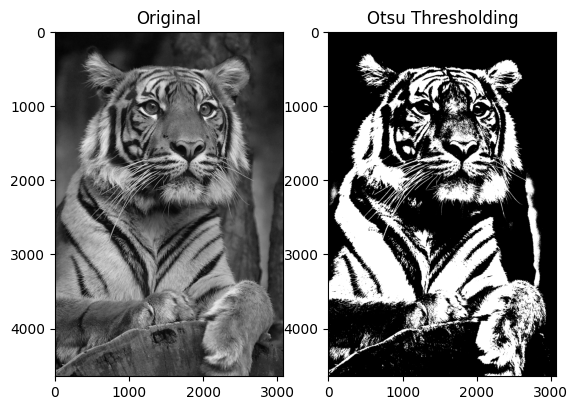

In [ ]:
# Otsu's Binarization Method

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('tiger.jpg')

if len(image.shape) == 3:
    image = np.mean(image, axis = 2).astype(np.uint8)

image_size = image.size
hist , bins = np.histogram(image, bins = 256, range = (0, 255))
hist_prob = hist / float(image_size)
cumsum_prob = np.cumsum(hist_prob)
mean_intensity = np.sum(np.arange(256) * hist_prob)
best_threshold = 0
max_varience = 0


for threshold in range (1,256):
    prob1 = cumsum_prob[threshold]
    prob2 = 1-prob1
    mean1 = np.sum(np.arange(threshold) * hist_prob[:threshold])
    mean2 = (mean_intensity - (prob1 * mean1)) / prob2

    between_class_variance = prob1 * prob2 * (mean1 - mean2)**2
    if between_class_variance > max_varience:
        max_varience = between_class_variance
        best_threshold = threshold

otsu_thresholded = (image >= best_threshold)

plt.figure(figsize=(10,5))


plt.subplot(131)
plt.title('Original')
plt.imshow(image , cmap = 'gray')

plt.subplot(132)
plt.title('Otsu Thresholding')
plt.imshow(otsu_thresholded , cmap = 'gray')

plt.show()





In [ ]:
# Once you have performed the binary image conversion, write a
# Python script to find out area (Pixel distribution) within the entire
# binary image and output it as a percentage.


import numpy as np
import matplotlib.pyplot as plt

img=plt.imread("tiger.jpg")

if img.shape[-1]==3:
    img=np.dot(img[...,:3],[0.28,0.59,0.11])

# Local
block_size=10
constant_err=3

height,width=img.shape
local_thresholding=np.zeros_like(img,dtype=np.uint8)

for i in range(0,height,block_size):
    for j in range(0,width,block_size):
        block=img[i:i+block_size,j:j+block_size]
        block_mean=np.mean(block)
        threshold=block_mean-constant_err
        local_thresholding[i:i+block_size,j:j+block_size]=(block>=threshold)*255

# total pixel
height,width=local_thresholding.shape
total_pixel=height*width

# White pixel
white_count=0
for i in range(height):
    for j in range(width):
        if(local_thresholding[i,j]==255):
            white_count=white_count+1

white_percentage=white_count*100/total_pixel

print("Total percentage is:",white_percentage)

Total percentage is: 67.90569847526179
